In [1]:
import requests
import json
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from re import search
from requests.packages import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
'''
Esta classe requer os parâmetros 'url' indicando o endereço da API
e o parâmetro 'filename' sendo o nome do arquivo JSON
que vai ser gerado com a requisição feita através da API
'''

class RickAndMortyAPI():

    # Construtor para instanciar objetos da classe
    def __init__(self, url, filename):
        self.characters: list = []
        self.url: str = url
        self.filename: str = filename

    # Retornar uma lista com todos os personagens da API
    def __getAPI(self, count):
        characters = []
        next_url = self.url
        while next_url and count > 0:
            rq_next = requests.get(next_url, verify=False)
            data_next = json.loads(rq_next.content)
            next_url = data_next['info']['next']
            characters += data_next['results']
            count -= 20
        return characters

    # Armazenando os personagens no atributo da classe
    def getCharacters(self, count):
        self.characters = self.__getAPI(count)

    # Método de escrita dos personagens em um arquivo JSON
    def writeFile(self):
        j = json.dumps(self.characters, indent=4, separators=(',', ':'))
        with open(f"{self.filename}", "w") as outfile:
            outfile.write(j)


In [3]:
n_characters = 300
url = "https://rickandmortyapi.com/api/character"
filename = "personagens.json"
api = RickAndMortyAPI(url, filename)
api.getCharacters(n_characters)
api.writeFile()

In [4]:
class Characters():

    def __init__(self, filename):

        self.char: dict = {}
        self.filename = filename

    def readFile(self):

        with open(self.filename, 'r') as openfile:
            json_object = json.load(openfile)
        self.char = json_object

    def show_character(self, list_found):
        max_char = 3
        fig = plt.figure()
        columns = len(list_found)
        
        if columns > max_char:
            columns = max_char

        for i in range(columns):

            ax = fig.add_subplot(1, columns, i+1)
            url_img = str(list_found[i]['image'])
            img = imageio.imread(url_img)
            ax.axis('off')
            plt.title(list_found[i]['name'], fontsize = 11)
            plt.imshow(img)
            ax.text(0.5, -0.1, list_found[i]["location"]["name"], size=8,ha = 'center', transform=ax.transAxes)
            ax.text(0.5, -0.2, list_found[i]["species"],size=8,  ha = 'center',transform=ax.transAxes)
            ax.text(0.5, -0.3, list_found[i]["status"],size=8,  ha = 'center',transform=ax.transAxes)
            plt.tight_layout()

        
    def search_character(self, substring):
        char_found = []
        count = 0
        for i in range(len(self.char)):
            if substring != None and len(substring) > 0 and \
                substring.lower() in self.char[i]["name"].lower():
                count +=1
                char_found.append(self.char[i])
                
        if not count:
            print("Personagem não encontrado")
        else:
            self.show_character(char_found)
            
    def all_character(self):

        for i in range(len(self.char)):
            print(self.char[i]['name'])


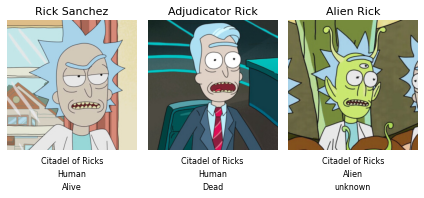

In [5]:
api_ram = Characters(filename)
api_ram.readFile()
api_ram.search_character("Rick")

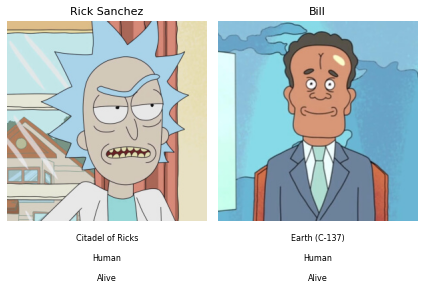

In [6]:
api_ram.show_character([api_ram.char[0], api_ram.char[44]])